In [ ]:
pip install mglearn

     |████████████████████████████████| 542kB 3.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=81b8e606cfc6c8cc7360d0b8dcc52fb05e457a522369a923189f6738ef255d66
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# 평균 0, 분산 1을 갖도록 X_features scaling : 여러 scaler 중 하나
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import mglearn

# PCA

## 1) 데이터 로드 및 확인

위스콘신 대학교에서 제공한 유방암 진단결과 데이터  

feature  
* 양성(benign, 0)과 악성(malignant, 1)을 구분할 수 있는 종양의 크기, 모양 등의 다양한 특성값을 가진다.
* `mean_` : 1 ~ 10번째 feature는 특성별 평균값을 의미한다.
* `_error` : 11 ~ 20번째 feature는 특성별 표준오차(Standard Error)를 의미한다.
* `worst_` : 21 ~ 30번째까지는 각 종양의 특성들에서 제일 큰 3개의 값을 평균낸 값을 의미한다.


<a title="Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"><img width="512" alt="Micrograph of ductal carcinoma with marked nuclear pleomorphism and increased mitotic rate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg/512px-Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg">Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
# cancer 데이터는 총 30개 feature와 569개 sample로 이루어진 학습데이터를 가지고 있다.
cancer['data'].shape

(569, 30)

In [ ]:
# 데이터프레임으로 feature와 target값을 확인해보자
df_x = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_y = pd.DataFrame(cancer.target, columns = ['target'])
df_cancer = pd.concat([df_x,df_y], axis=1)
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


차원 축소를 하기에 앞서 X feature들 간의 단위 차이를 조정해줘야한다. -> scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# 평균 = 0, 분산 = 1 로 스케일 조정
scaler = StandardScaler()
scaler.fit(cancer.data)
data = scaler.transform(cancer.data)

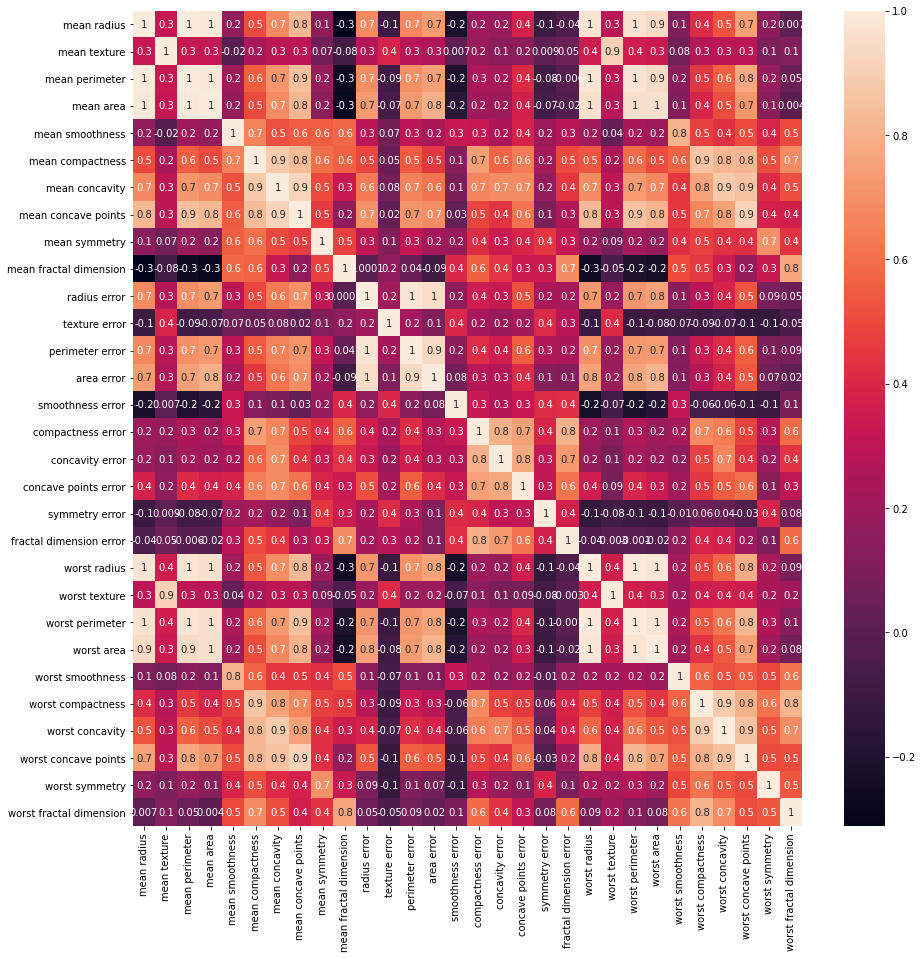

In [ ]:
# DataFrame의 corr()를 이용해 각 feature간의 상관도를 확인해보자
X_features = pd.DataFrame(data, columns = cancer.feature_names)
corr = X_features.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt = '.1g')

## 2) 모델링

PCA
* 주요 parameter:
 - `n_components` : 주성분 개수
        주성분 개수를 n으로 정하면, 상위 n개의 주성분만 유지


참고 : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

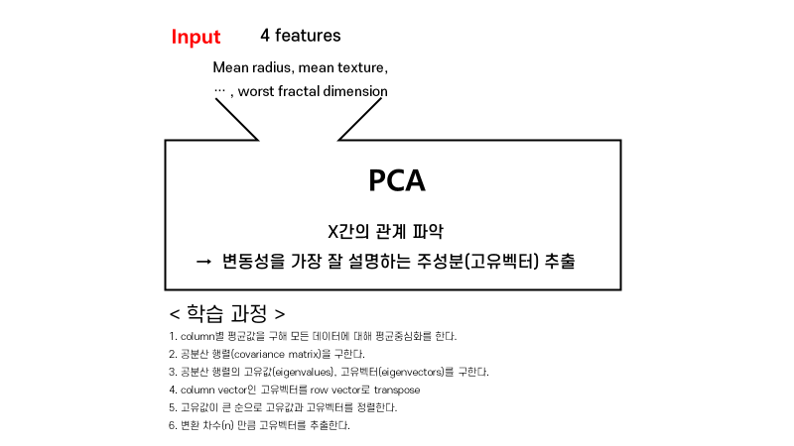

In [ ]:
pca = PCA(n_components=2) #주성분 개수 = 2개

# pca model 학습 : X_data만 필요
pca.fit(data)

# 학습된 pca model을 이용해 data 변환 : 차원 축소
data_pca = pca.transform(data)
print("원본 데이터 형태:", str(data.shape))
print("축소된 데이터 형태:", str(data_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


## 3) 결과확인

In [ ]:
# 차원 축소 결과를 데이터프레임으로 확인해보자
result = pd.DataFrame(data_pca, columns = ['1st_principle_component', '2nd_principle_component'])
result

,1st_principle_component,2nd_principle_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


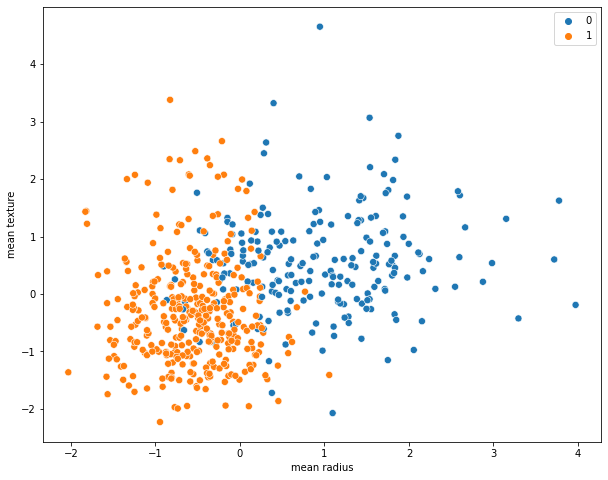

In [ ]:
# 차원축소 전 데이터 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(data[:, 0], data[:,1], cancer.target, s = 50)

plt.legend(loc="best") #범례 추가 (loc = 위치 0, 1, 2, 3, best)
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


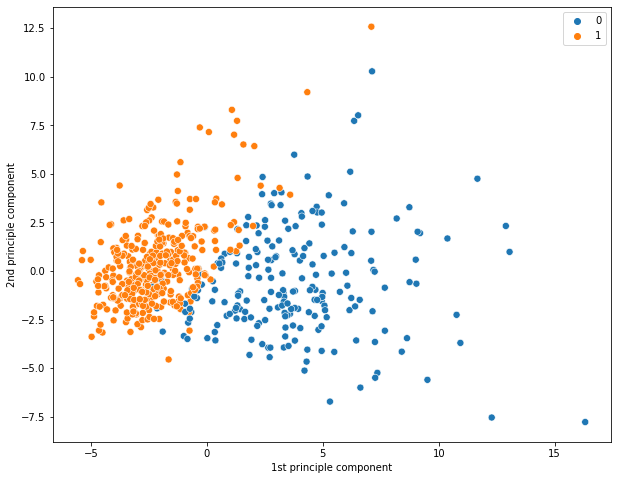

In [ ]:
# 차원축소 후 데이터 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(data_pca[:,0], data_pca[:,1], cancer.target, s = 50)

plt.legend(loc="best") #범례 추가 (loc = 위치 0, 1, 2, 3, best)
plt.xlabel("1st principle component")   
plt.ylabel("2nd principle component")
plt.show()

그렇다면 2개의 principal component은 원본 데이터의 변동성을 얼마나 설명하는지 알아보자.

In [ ]:
# explained_variance_ratio_ 속성은 전체 변동성에서 개별 principal component별로 차지하는 변동성 비율을 제공한다
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

첫 번째 principal component은 전체 변동성의 약 44.27%를 차지하며, 두번째 principal component은 약 18.97%를 차지하는 것을 확인할 수 있다.

principle components는 원본 feature들의 조합으로 표현할 수 있다.  
그럼 어떤 조합으로 이루어져 있을까?

In [ ]:
# components_ 속성은 각 principal component에 포함된 원본 feature들의 조합을 보여준다.
print(pca.components_[0], pca.components_[1], sep='\n\n')

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]

[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


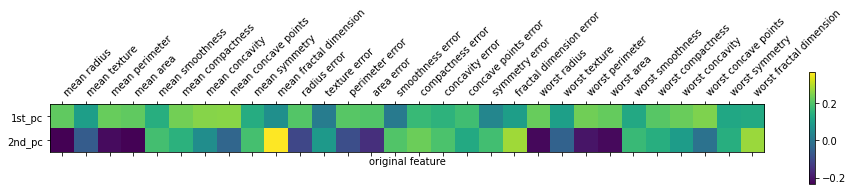

In [ ]:
# 시각화로 확인해보자.

plt.matshow(pca.components_) #heatmap

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=45, ha = 'left')
plt.yticks([0, 1], ["1st_pc", "2nd_pc"])

plt.xlabel("original feature")

plt.colorbar()

plt.show()

# (심화학습) PCA pseudo code



```
class SVC(object):
    
    학습 과정
    def fit(X_data):
        1. column별 평균값을 구해 모든 데이터에 대해 평균중심화를 한다.
        2. 공분산 행렬(covariance matrix)을 구한다.
        3. 공분산 행렬의 고유값(eigenvalues), 고유벡터(eigenvectors)를 구한다.
        4. column vector인 고유벡터를 row vector로 transpose
        5. 고유값이 큰 순으로 고유값과 고유벡터를 정렬한다.
        6. 변환 차수(n) 만큼 고유벡터를 추출한다.


    예측 과정
    def predict(X_data):
        1. 학습된 Weight, bias를 활용하여 입력받은 데이터에 대해 계산
        2. 예측값의 부호 return

```


참고 : https://www.python-engineer.com/courses/mlfromscratch/11_pca/

In [ ]:
import numpy as np


class PCA(object):
    def __init__(self, n_components):
        """
        [hyper_parameter]
        n_coponents: 주성분 개수
        """
        self.n_components = n_components
        self.components = None
        self.mean = None


    # 학습과정
    def fit(self, X):
        # column별 평균값을 구해 모든 데이터에 대해 평균중심화를 한다.
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # 공분산 행렬(covariance matrix)을 구한다
        cov = np.cov(X.T)

        # 공분산 행렬의 고유값(eigenvalues), 고유벡터(eigenvectors)를 구한다
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # column vector인 고유벡터를 row vector로 transpose 
        eigenvectors = eigenvectors.T

        # 고유값이 큰 순으로 고유값과 고유벡터를 정렬한다
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # 변환 차수(n) 만큼 고유벡터를 추출한다
        self.components = eigenvectors[0 : self.n_components]


    # 변환과정
    def transform(self, X):
        # 평균 중심화
        X = X - self.mean

        # 변환된 값을 return
        return np.dot(X, self.components.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


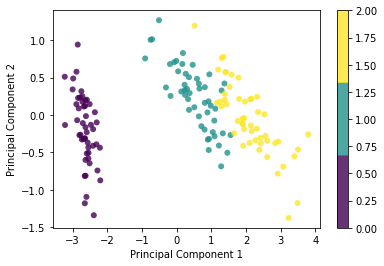

In [ ]:
# Testing
import matplotlib.pyplot as plt
from sklearn import datasets

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()